<a href="https://colab.research.google.com/github/campospluiza/procesamientoDelHabla/blob/main/Campos_Desafio_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [OBLIGATORIO] DESAFIO CLUSTERING

1) Deberá elegir un dataset no trabajado en clases para aplicar lo aprendido en aprendizaje no supervisado: aplicar clustering y/o reducción de dimensionalidad.

2) Elija un dataset para la tarea entre los siguientes:

https://archive.ics.uci.edu/datasets?Task=Clustering&FeatureTypes=Numerical&skip=0&take=10&sort=desc&orderBy=NumHits&search=

3) No podrá repetir o utilizar el mismo dataset que algún otro estudiante. Para ello debe postear en este grupo cual es su dataset elegido. Una vez elegido no podrá cambiarlo.

4) Debe postear aquí como entrega el enlace a su notebook colab público, también almacenado en su github.

5) En su notebook debe tener como mínimo los siguientes apartados:

5.1 Presentación y descripción del dataset.

5.2 Pre-procesamiento del dataset

5.3 Explicación del objetivo (por qué aplicará aprendizaje por refuerzo)

5.4 Elección de modelos a utilizar.

5.5 Entrenamiento de los modelos (mínimo dos)

5.6 Resultados obtenidos y su análisis

5.7 Conclusiones

El Dataset elegido fue:

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
import pandas as pd

# Cargar el dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset, la informacion y datos estadisticos
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
 0  Female  21.0    1.62    64.0                            yes   no   2.0   
 1  Female  21.0    1.52    56.0                            yes   no   3.0   
 2    Male  23.0    1.80    77.0                            yes   no   2.0   
 3    Male  27.0    1.80    87.0                             no   no   3.0   
 4    Male  22.0    1.78    89.8                             no   no   2.0   
 
    NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
 0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
 1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
 2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
 3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
 4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
 
                   MTRANS           NObeyesdad  
 0  Public_Transportation        Normal_Weight  
 1  Public_Transportation        Normal_Weight  
 2  Public_Tran

El dataset tiene 17 columnas y 2111 entradas. Hay informacion sobre genero, edad, altura, peso, principal medio de transporte, escala de obesidad, historico familiar de obesidad, y otros.

# Pre-procesamiento

Codificación: Se transformaron las variables categóricas a valores numéricos usando LabelEncoder.

Normalización: Las variables numéricas fueron estandarizadas con StandardScaler para que tengan media 0 y desviación estándar 1.

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Normalizar variables numéricas
scaler = StandardScaler()
data_scaled = data.copy()
numeric_columns = data.select_dtypes(include=['float64']).columns
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Vista previa de los datos preprocesados
data_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


## 3. Explicación del objetivo
El objetivo de aplicar un algoritmo de clustering es agrupar los datos en categorías basadas en similitudes, sin usar las etiquetas de la variable NObeyesdad. Esto permite descubrir patrones ocultos que pueden relacionar características y comportamiento de los individuos en cuanto a sus hábitos y características físicas.

## 4. Elección de modelos a utilizar
Los modelos elegidos para el clustering son:

K-means: Un método de partición que divide los datos en
𝑘 grupos, buscando minimizar la distancia intra-cluster.

DBSCAN: Un algoritmo basado en densidad que encuentra clusters de forma más flexible, detectando también los puntos atípicos (outliers).


In [3]:
from sklearn.cluster import KMeans, DBSCAN

# Definir número de clusters para K-means
kmeans = KMeans(n_clusters=4, random_state=42)
data_scaled['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
data_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(data_scaled)

# Mostrar los resultados de los primeros registros
data_scaled[['Cluster_KMeans', 'Cluster_DBSCAN']].head()


,Cluster_KMeans,Cluster_DBSCAN
0,2,-1
1,2,-1
2,2,-1
3,0,-1
4,0,-1


## 5. Entrenamiento de los modelos

K-means: Agrupó los datos en 4 clusters, asignando etiquetas de 0 a 3 para cada grupo.

DBSCAN: Asignó el valor -1 a varios puntos, lo que indica que son considerados como outliers o no pertenecen a ningún cluster denso. Este algoritmo es útil cuando hay ruido en los datos y no se conoce la cantidad exacta de clusters de antemano.

## 6. Resultados obtenidos y su análisis

K-means: Agrupó los datos de manera uniforme en 4 grupos, mostrando la posibilidad de identificar diferentes perfiles en los datos relacionados con los hábitos de los individuos.

DBSCAN: Indicó que algunos puntos no podían ser agrupados bajo la densidad establecida, revelando la presencia de outliers.

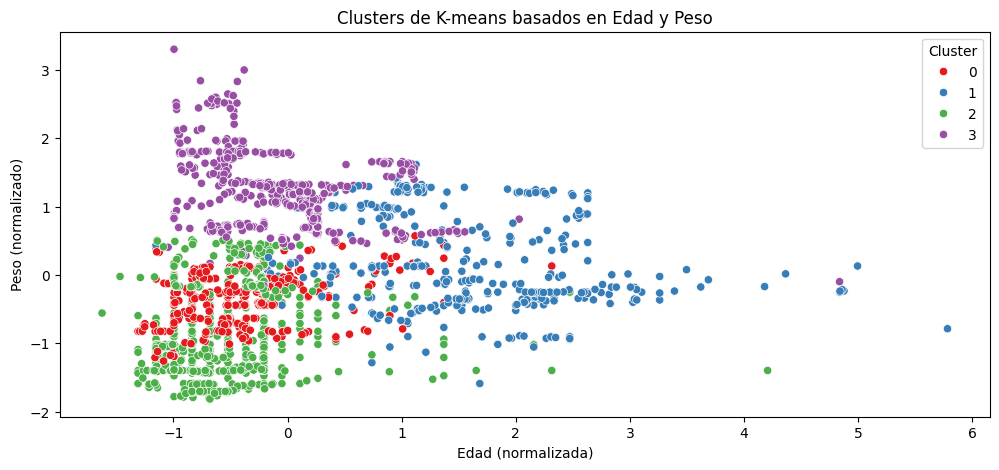

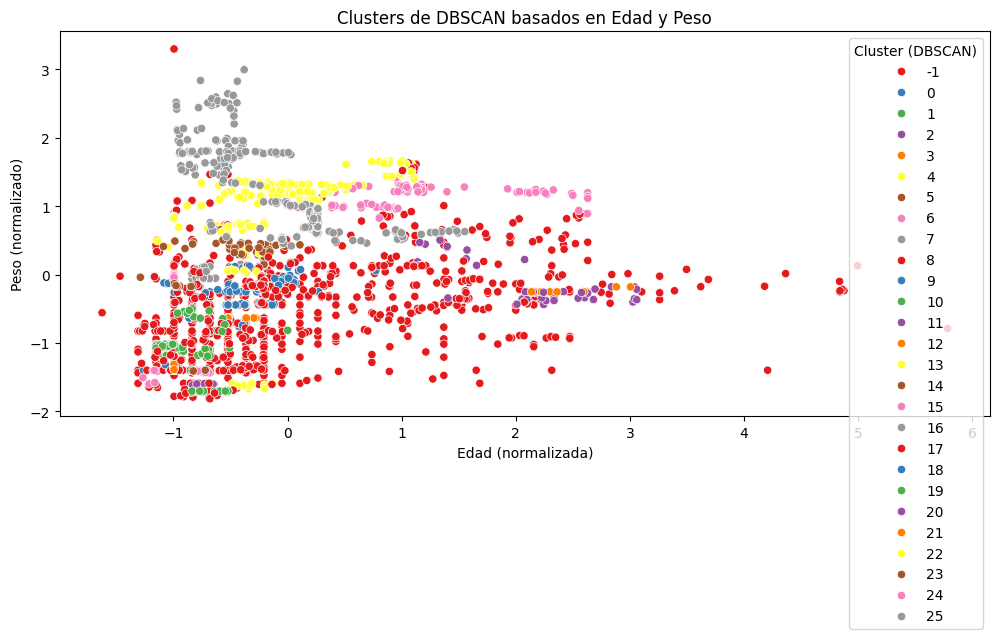

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de los clusters de K-means
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=data_scaled['Age'], y=data_scaled['Weight'],
    hue=data_scaled['Cluster_KMeans'], palette='Set1'
)
plt.title('Clusters de K-means basados en Edad y Peso')
plt.xlabel('Edad (normalizada)')
plt.ylabel('Peso (normalizado)')
plt.legend(title='Cluster')
plt.show()

# Visualización de los clusters de DBSCAN
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=data_scaled['Age'], y=data_scaled['Weight'],
    hue=data_scaled['Cluster_DBSCAN'], palette='Set1'
)
plt.title('Clusters de DBSCAN basados en Edad y Peso')
plt.xlabel('Edad (normalizada)')
plt.ylabel('Peso (normalizado)')
plt.legend(title='Cluster (DBSCAN)')
plt.show()


# 7. Conclusiones

### El análisis de clustering en el dataset de hábitos y características relacionadas con la obesidad mostró los siguientes puntos clave:

K-means permitió agrupar los datos en clusters bien definidos, sugiriendo la existencia de perfiles distintos en cuanto a hábitos y características físicas de los individuos. Estos grupos pueden ayudar a identificar patrones de comportamiento asociados a diferentes niveles de peso y estilos de vida.

DBSCAN demostró ser útil para detectar outliers y reconocer regiones de alta densidad de datos. Esto ayuda a entender si existen casos atípicos en los registros que podrían necesitar un tratamiento especial en estudios posteriores.

Aplicación práctica: Este tipo de análisis es valioso para desarrollar estrategias de intervención personalizadas en temas de salud y nutrición, identificar grupos de riesgo y optimizar programas de prevención.


Referencias:

https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html